<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Создание-коннекции-к-базе-и-выгрузка-данных." data-toc-modified-id="Создание-коннекции-к-базе-и-выгрузка-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Создание коннекции к базе и выгрузка данных.</a></span></li><li><span><a href="#Предобработка-данных." data-toc-modified-id="Предобработка-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных.</a></span></li></ul></div>

# Подготовка данных для дашборда.

## Создание коннекции к базе и выгрузка данных.

In [31]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string) 

query = ''' SELECT *
            FROM dash_visits
        '''

dash_visits = pd.io.sql.read_sql(query, con = engine)

In [3]:
dash_visits.sample(10)

,record_id,item_topic,source_topic,age_segment,dt,visits
22034,1062631,Путешествия,Кино,18-25,2019-09-24 18:30:00,1
18065,1058662,Подборки,История,26-30,2019-09-24 18:56:00,20
30057,1070654,Юмор,Музыка,36-40,2019-09-24 18:57:00,3
5955,1046552,Знаменитости,Знаменитости,18-25,2019-09-24 18:32:00,2
10820,1051417,Красота,Деньги,18-25,2019-09-24 18:54:00,3
13521,1054118,Наука,Интерьеры,26-30,2019-09-24 19:00:00,1
29393,1069990,Шоу,Семейные отношения,18-25,2019-09-24 18:29:00,3
8898,1049495,Искусство,Полезные советы,26-30,2019-09-24 18:59:00,10
22633,1063230,Путешествия,Семья,18-25,2019-09-24 18:30:00,3
8389,1048986,Искусство,Деньги,36-40,2019-09-24 19:00:00,1


## Предобработка данных.

Посмотрим на общую информацию о таблице.

In [4]:
dash_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


Таблица состоит из 6 столбцов и 30745 строк. Типы данных соответствуют хранящейся в столбцах информации. Пропусков в таблице нет. Проверим данные на корректность и наличие дубликатов.

In [5]:
dash_visits['record_id'].nunique()

30745

Все идентификаторы записей уникальны, так как их количество соответствует количеству строк в таблице.

In [35]:
print(dash_visits['item_topic'].value_counts())
print(f'Всего {dash_visits.item_topic.nunique()} тем')

Отношения             1536
Интересные факты      1535
Наука                 1505
Подборки              1456
Полезные советы       1424
Общество              1422
Россия                1385
История               1363
Семья                 1287
Путешествия           1247
Деньги                1234
Женщины               1230
Дети                  1229
Туризм                1206
Здоровье              1203
Красота               1193
Культура              1160
Юмор                  1129
Искусство             1119
Рассказы              1109
Психология            1056
Скандалы              1023
Знаменитости           976
Женская психология     914
Шоу                    804
Name: item_topic, dtype: int64
Всего 25 тем


In [36]:
print(dash_visits['source_topic'].value_counts())
print(f'Всего {dash_visits.source_topic.nunique()} тем')

Семейные отношения    1822
Россия                1687
Знаменитости          1650
Полезные советы       1578
Путешествия           1563
Кино                  1505
Дети                  1459
История               1437
Семья                 1405
Одежда                1379
Здоровье              1243
Искусство             1228
Авто                  1077
Психология            1055
Сад и дача            1036
Политика              1024
Спорт                 1007
Сделай сам             995
Ремонт                 985
Деньги                 973
Еда                    912
Интерьеры              809
Строительство          758
Музыка                 750
Технологии             741
Финансы                667
Name: source_topic, dtype: int64
Всего 26 тем


In [9]:
dash_visits['age_segment'].value_counts()

18-25    7056
26-30    5875
31-35    5552
36-40    5105
41-45    3903
45+      3254
Name: age_segment, dtype: int64

Названия тем карточек и источников корректны. Посетители разбиты на 6 возрастных категорий.  
Узнаем за какой период предоставлены данные.

In [14]:
print(dash_visits['dt'].min(), '\n',
      dash_visits['dt'].max())

2019-09-24 18:28:00 
 2019-09-24 19:00:00


Данные включают в себя период всего 32 минуты за сутки 24 сентября 2019 г.  
Изучим столбец с данными о посещениях.

In [15]:
dash_visits['visits'].describe()

count    30745.000000
mean        10.089673
std         19.727601
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        371.000000
Name: visits, dtype: float64

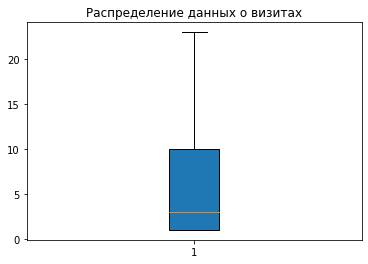

In [32]:
plt.boxplot(dash_visits['visits'], patch_artist=True, showfliers=False)
plt.title('Распределение данных о визитах');

В данных о визитах имеются выбросы, так как максимальное число посещений равно 371, а медиана равна 3. Но это нормально, так как интерес к определенной тем нестабилен, а зависит от множества факторов

In [33]:
dash_visits.duplicated().sum()

0

Дубликатов в таблице также не обнаружено.  

Экспортируем полученные данные в csv-файл.

In [37]:
dash_visits.to_csv('dash_visits.csv', index=False)

**Вывод.**  

Выгрузили данные для проекта из базы данных. Провели предобработку данных, хранящихся в таблице - все данные оказались корректными. Сохранили данные в csv-файл.